## Lets Start by Importing few Important Libraries
     please make sure to save the notebook on the same directory where you have saved the data. 
   ### Enjoy! 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import datetime
from functools import reduce
import warningsbbb
warnings.filterwarnings('ignore')

## Set up jupyter notebook
    Extract the repositories from git
    Run following kernel to get file import hassel free working
   ### Enjoy!

In [25]:
from pathlib import Path
mypath = Path().absolute()
mypath = str(mypath) + '/Data'

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['DGS1.xls',
 'DGS10.xls',
 'DGS2.xls',
 'DGS3.xls',
 'DGS30.xls',
 'DGS3MO.xls',
 'DGS5.xls']

## Example data from the exel, uncleaned
    First few lines contains the description about the data, which we don't need for our analysis. 

In [12]:
file_1 = pd.read_excel(str(mypath)+'/DGS10.xls')
file_1.head(15)

,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fred.stlouisfed.org/help-faq,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN
5,NaN,NaN
6,DGS10,"10-Year Treasury Constant Maturity Rate, Perce..."
7,NaN,NaN
8,Frequency: Daily,NaN
9,observation_date,DGS10


## Data Import and Cleaning
    
    Using a For loop to find all the excel files
    Each loop does following:
        1. Import the file
        2. Remove the unwanted description.
        3. Remove NAs
        4. Reset Index
        5. Rename the column
        6. Remove records with interest rate = 0 (mostly Sunday and public holidays)
        7. Convert date from str to datetime


In [19]:

files_xls = [i for i in onlyfiles if i[-3:]== 'xls']                 # import only xls

all_file={}

for j in files_xls:
    
    file = pd.read_excel('Data/'+ str(j)).dropna()                                 # import excel file, removed rows with Nan
    
    file.reset_index(inplace= True, drop =True)                      # reset index

    for k in file.index:                                             # To rename the columns, for loop will search for datetime 
        if type(file.loc[k][0]) == datetime.datetime:                # untill finds a datetime and rename the column 
            break
    file.columns = file.iloc[k-1]

    for k,i in  enumerate(file[str(file.columns[0])]):               # Data cleaning for bad datetime
        if type(i) != datetime.datetime:
            file.drop(k, inplace= True)
            
    file.drop(file[file[file.columns[-1]]==0].index, inplace= True)  # Drop all rows with interest rate 0, mainly weekends
    
    file.reset_index(drop= True, inplace = True)                     # Reset Index
    
    file['observation_date'] = pd.to_datetime(file['observation_date'])
    
    all_file[str(j)] = file                                          # Save clean DataFrame in the empty dictionary
    

---
## Merge columns from all the DataFrames
    
    Using Pandas.merge(), inner join on date field 
    Using reduce fuction, inner join all seven Dataframes in single line of code, 

In [20]:
result = reduce(lambda left, right: pd.merge(left, right , sort=False,
                                              on = ['observation_date'], 
                                              how = 'outer'), all_file.values())
result.tail(15)

1,observation_date,DGS1,DGS10,DGS2,DGS3,DGS30,DGS3MO,DGS5
14146,2018-08-22,2.43,2.82,2.6,2.65,2.99,2.09,2.7
14147,2018-08-23,2.43,2.82,2.61,2.66,2.97,2.08,2.72
14148,2018-08-24,2.44,2.82,2.63,2.68,2.97,2.09,2.72
14149,2018-08-27,2.47,2.85,2.67,2.7,3,2.12,2.74
14150,2018-08-28,2.47,2.88,2.67,2.73,3.03,2.13,2.77
14151,2018-08-29,2.48,2.89,2.67,2.75,3.02,2.13,2.78
14152,2018-08-30,2.47,2.86,2.64,2.72,3,2.11,2.75
14153,2018-08-31,2.46,2.86,2.62,2.7,3.02,2.11,2.74
14154,2018-09-04,2.49,2.9,2.66,2.73,3.07,2.13,2.78
14155,2018-09-05,2.49,2.9,2.66,2.72,3.08,2.14,2.77


---
## Plot Interactive Visualizations
    
    -for installation
        $ pip install plotly 
            or
        $ pip install plotly --upgrade
        
    Using plotly for python,
        use mouse pointer to see the exact tooltip values
        Enjoy the zoom by drawing a square to part of the graph to look closely. 
        
   ### Enjoy!
   
       Future version will have a drop down filters
    

In [495]:
import plotly
plotly.tools.set_credentials_file(username='charchil1010', api_key='h6iK0B8bluU0nNJ1oZti')

y_col =  [i for i in result.columns if i != 'observation_date']

result.iplot(kind='scatter',x='observation_date',y= y_col, size=25)

The draw time for this plot will be slow for all clients.


### If plotly doesn't work
 Using matplotlib plot()

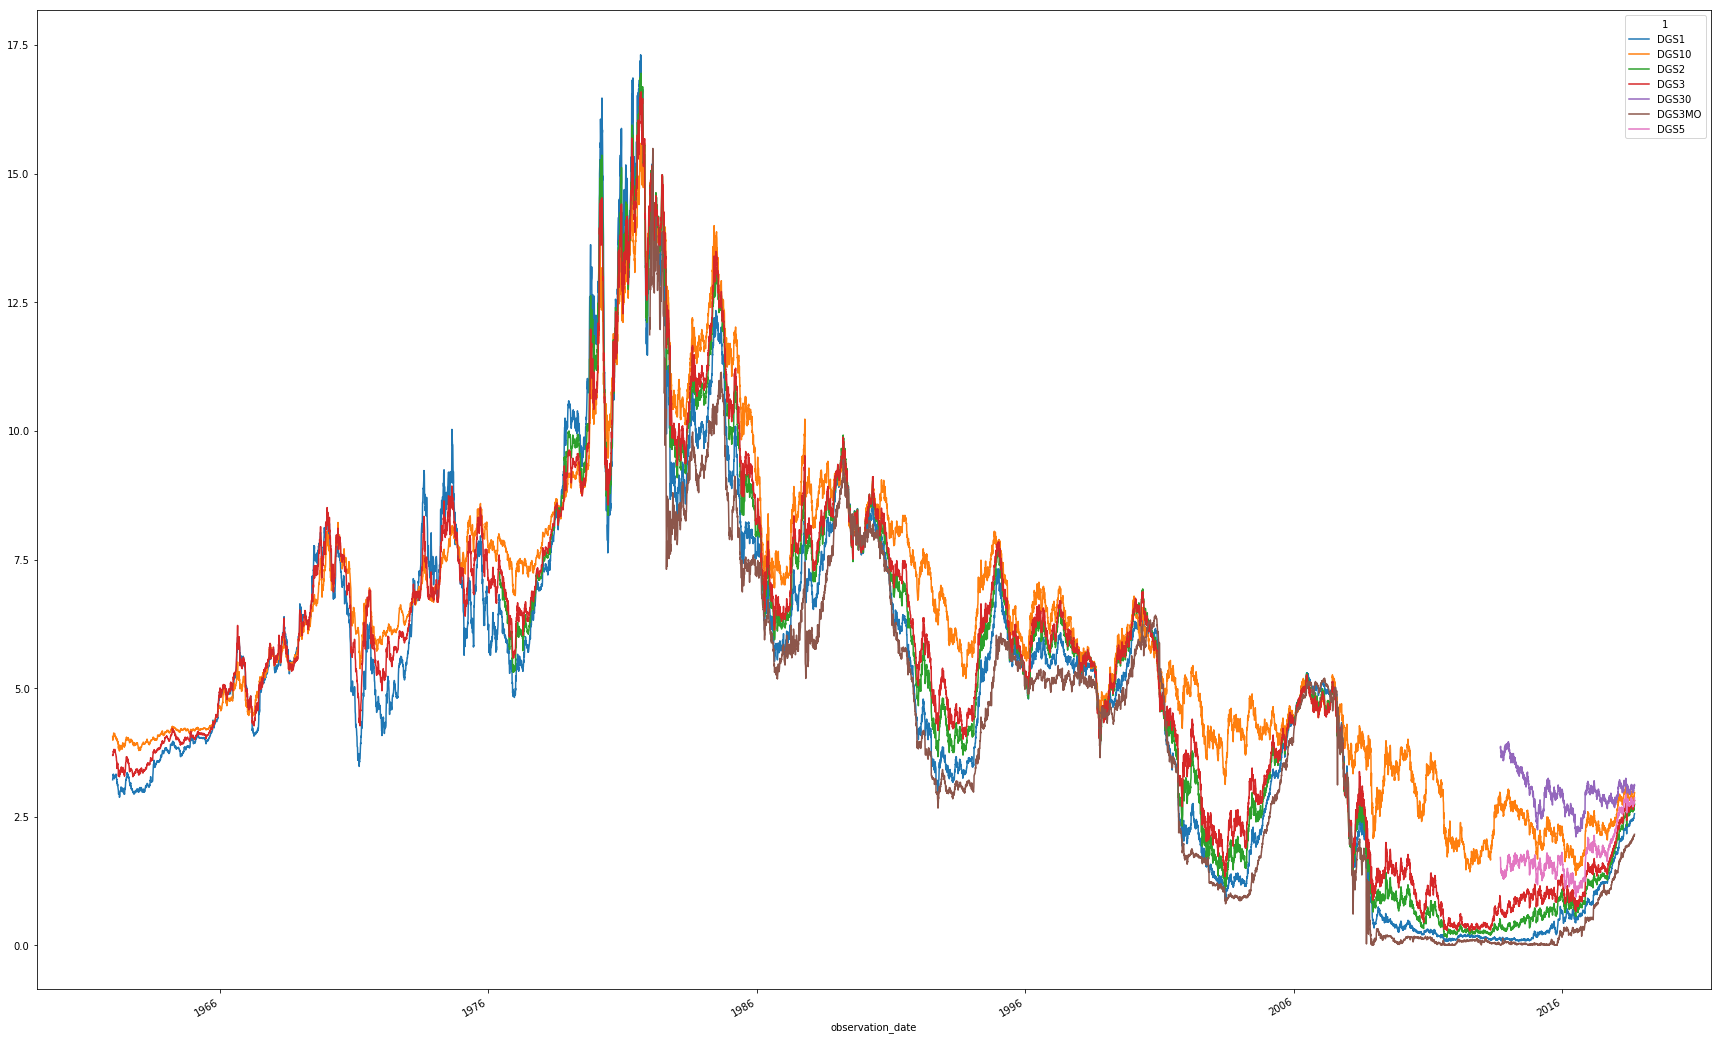

In [499]:
result.plot(x ='observation_date', y = y_col, figsize= (30,20))